# Project Machine Learning LELEC2870

## Import 


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [17]:
# import data set
# X1, Y1
X_1 = pd.read_csv('X1.csv')
y_1 = pd.read_csv('Y1.csv', header=None)
y_1.columns = ["target"]


#X2, Y2
X_2 = pd.read_csv('X2.csv')



## Data Exploratory Analysis 

### valid data set check 

In [18]:
# check wether dataset contains null values
print(X_1[["Age", "Height"]].isnull().sum())

# check wether dataset contains missing values
X_1.dropna()

print(X_1.count())

Age       0
Height    0
dtype: int64
Unnamed: 0                        250
Gender                            250
Age                               250
Height                            250
family_history_with_overweight    250
FAVC                              250
FCVC                              250
NCP                               250
CAEC                              250
SMOKE                             250
CH2O                              250
SCC                               250
FAF                               250
TUE                               250
CALC                              250
MTRANS                            250
dtype: int64


-> No null or missing observations for continuous variables

### continuous variables 

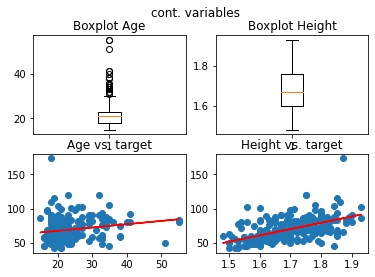

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.suptitle("cont. variables")

axes[0,0].boxplot(X_1["Age"])
axes[0,0].set_title('Boxplot Age')
axes[0,1].boxplot(X_1["Height"])
axes[0,1].set_title('Boxplot Height')

""" linearity between cont. var and target var """

# scat_plot_1
x = X_1['Age']
y = y_1['target']

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

axes[1,0].scatter(x, y)
axes[1,0].plot(x, m * x + b, color='red')
axes[1,0].set_title('Age vs. target')

# scat_plot_2
x = X_1['Height']
y = y_1['target']

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

axes[1,1].scatter(x, y)
axes[1,1].plot(x, m * x + b, color='red')
axes[1,1].set_title('Height vs. target')

plt.rcParams['figure.figsize'] = (10, 10)
plt.show()





$\bold{Age}$ is highly skewed, might be a problem for linreg later on whereas, $\bold{Height}$ seems to have no outliers

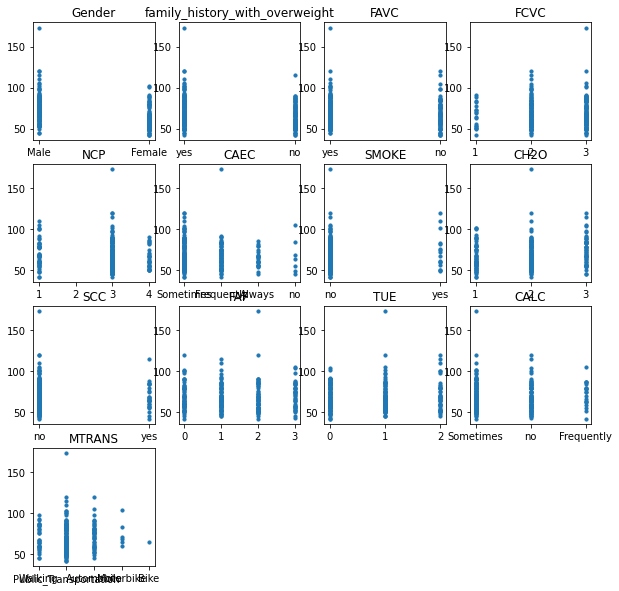

In [20]:
var_names = ['Gender', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 
'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
n_feats = len(var_names)
# 15 features

for i, var in enumerate(var_names):
    plt.subplot((n_feats//4+1), 4, i+1)
    plt.scatter(X_1[var], y_1, s=10)
    plt.title(var_names[i])

plt.rcParams['figure.figsize'] = (20, 20)
plt.tight_layout
plt.show()




E.G. MTRANS, aggréger des classes genre velo + à pied = sport/pas moteur

We need to pay attention to the fact that all the categories are not well balanced. i.e, there are way less non-smoker than smoker in the study 



In [21]:
# Data Cleaning :
# Je modifie les variable catégorielle sous forme de nombre en mots compréhensibles, c'est mieux pour la suite

# Création du dictionnaire
dummies_dict = {"FCVC": {1.0: "Never", 2.0: "Sometimes", 3.0: "Always"},
                  "NCP": {1.0: "Betw1_2", 2.0: "Three", 3.0: "Tree++"},
                  "CH2O": {1.0: "Less1L", 2.0: "Betw1_2", 3.0: "Two++"},
                  "FAF": {1.0: "no_acti", 2.0: "1_2Day", 3.0: "2_4Day", 4.0: "4_5Day"},
                  "TUE": {1.0: "0_2hour", 2.0: "3_5hour", 3.0: "Five++"}}

# Remplacement dans le dataframe
X_1 = X_1.replace(dummies_dict)
X_2 = X_2.replace(dummies_dict)

print(X_1.shape)
print(X_2.shape)

# Binarized categorical variables
X_1_cleaned = pd.get_dummies(X_1,
                                   columns=["Gender", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC",
                                            "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"],
                                   prefix=["Gender", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC",
                                           "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"], )#drop_first=True)

X_2_cleaned = pd.get_dummies(X_2,
                                   columns=["Gender", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC",
                                            "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"],
                                   prefix=["Gender", "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC",
                                           "SMOKE", "CH2O", "SCC", "FAF", "TUE", "CALC", "MTRANS"], )#drop_first=True )

X_2_cleaned = X_2_cleaned.drop(columns=['CALC_Always', 'Gender_Male', 'family_history_with_overweight_no', 'FAVC_no', 'SMOKE_no', 'SCC_no'])
X_1_cleaned = X_1_cleaned.drop(columns=['Gender_Male', 'family_history_with_overweight_no', 'FAVC_no', 'SMOKE_no', 'SCC_no'])

# explanatory with age and height scaled in order to give much more importance to dummies variables 
from sklearn.preprocessing import StandardScaler
min_max_scaler = StandardScaler()

X_1_cleaned[['Age', 'Height']] = min_max_scaler.fit_transform(X_1_cleaned[['Age', 'Height']])
X_2_cleaned[['Age', 'Height']] = min_max_scaler.fit_transform(X_2_cleaned[['Age', 'Height']])
X_1_cleaned = X_1_cleaned.iloc[: , 1:]
X_2_cleaned = X_2_cleaned.iloc[: , 1:]

(250, 16)
(248, 16)


In [22]:
print(X_1_cleaned.shape)
print(X_2_cleaned.shape)

(250, 35)
(248, 35)


## Scoring


In [23]:
# bmi calculator 
def get_bmi(w, h):
    return w/h**2


# RMSE calculator  
def compute_rmse(predict, target):
        # SOLUTION
    if len(target.shape) == 2:
        target = target.squeeze()
    if len(predict.shape) == 2:
        predict = predict.squeeze()
    diff = target - predict
    if len(diff.shape) == 1:
        diff = np.expand_dims(diff, axis=-1)
    rmse = np.sqrt(diff.T@diff / diff.shape[0])
    return float(rmse)

def score_weight_class(bmi_pred, bmi_true, low, high):
    tol = 1
    vpred = (bmi_pred>=low-tol) & (bmi_pred<high+tol)
    vtrue = (bmi_true>=low) & (bmi_true<high)
    if vtrue.sum()==0:
        print("no true sample here")
        return 0
    
    rmse = np.sqrt(((bmi_true[vtrue]-bmi_pred[vtrue])**2).mean())
    rmse = rmse/(high-low+tol)
    acc = (vpred&vtrue).sum()/vtrue.sum()
    return rmse*(1-acc)


def score_regression(ytrue, ypred, height):
    bmi_pred = ypred/(height*height)
    bmi_true = ytrue/(height*height)

    score = []
    for bmi_low, bmi_high in zip([0,18.5,25,30],[18.5, 25, 30, 100]):
        score.append(score_weight_class(bmi_pred, bmi_true, low = bmi_low, high = bmi_high))
        return np.mean(score)


def mybmi(X,y) :
    # Retourne un dataframe avec un colonne nommée bmi reprenant le bmi de chaque individu 
    return pd.DataFrame(y/(X**2), columns =["bmi"])


In [24]:
bmi = mybmi(X_1["Height"],y_1["target"])
# On catégorise avec label 0,1,2,3
bmi_continu = bmi
bmi["bmi"] = pd.cut(bmi["bmi"], bins=[0, 18.5, 25, 30, 100], labels=[0,1,2,3])
bmi = bmi.values.ravel()

Subsetting dataset X_1_cleaned

In [25]:
import statsmodels.api as sm

def backward_regression(X, y,
                           initial_list=[], 
                           list_removed=[],
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            #print(worst_feature,' rejected with p-value : ',round(worst_pval,4))
            included.remove(worst_feature)
            
        if not changed:
            break
    return included

In [26]:
bw = backward_regression(X_1_cleaned, y_1)
sub_X_1 = X_1_cleaned[bw]
sub_X_2 = X_2_cleaned[bw]

## model : linear regression 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(sub_X_1, y_1, test_size=0.3)

In [28]:
model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_train)


# R^2
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', round(r_sq, 4))

# RMSE 
print(round(compute_rmse(y_pred, y_train),4))
print("VARIABLES : ", bw, '\t')




coefficient of determination: 0.4191
10.8107
VARIABLES :  ['Age', 'Height', 'family_history_with_overweight_yes', 'FCVC_Always', 'FCVC_Never', 'FCVC_Sometimes', 'NCP_Betw1_2', 'CH2O_Betw1_2', 'CH2O_Less1L', 'CH2O_Two++', 'FAF_0.0', 'TUE_0.0', 'TUE_0_2hour', 'TUE_3_5hour', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no'] 	


for the sake of classification we need to get catgorical variables to target. Hence, we compute the bmi of each obs in Y_1 to train the KNN model. 
We use it as well for MLP 

## KNN 

In [29]:
X_train, X_test, bmi_train, bmi_test = train_test_split(sub_X_1, bmi, test_size=0.2, random_state=10)

## Constrained Model ['Age', 'Height', 'family_history_with_overweight_yes', 'NCP_Betw1_2', 'FAF_0.0'] 	

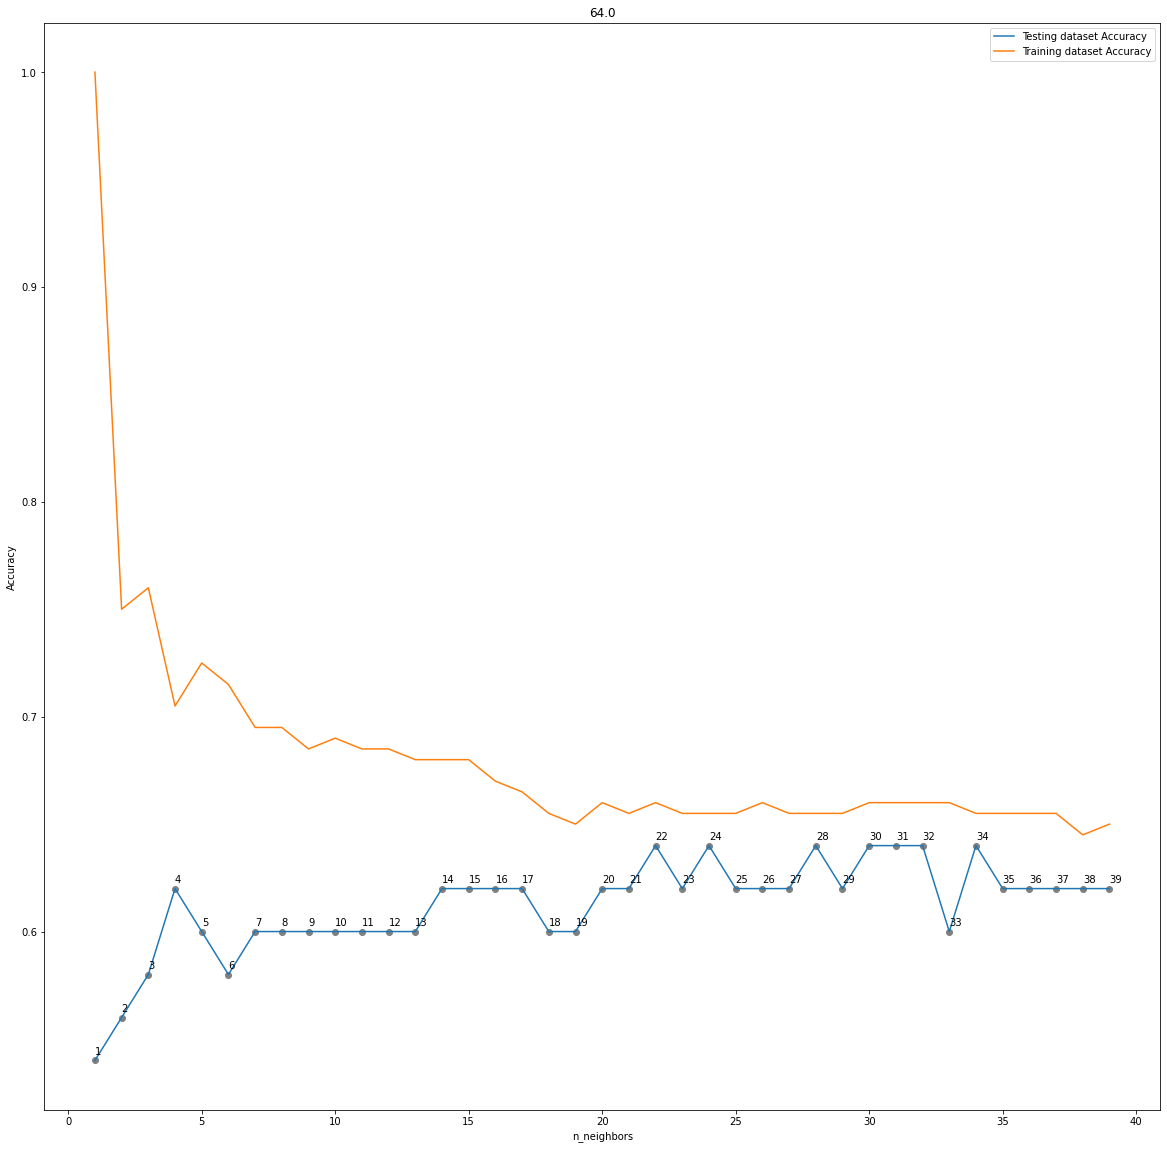

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# init of the tunning 
neighbors = range(1,40)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    # on train sur sub, recall sub vient du backward features selection
    knn.fit(X_train, bmi_train)

    # array that contains acc_score of both samples
    train_acc[i] = knn.score(X_train, bmi_train)
    test_acc[i] = knn.score(X_test, bmi_test)

plt.plot(neighbors, test_acc, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_acc, label = 'Training dataset Accuracy')
for k, acc in enumerate(test_acc):
    plt.text(k+1, acc+0.003, k+1)
    plt.scatter(k+1,acc, c = 'grey')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title(max(test_acc)*100)
plt.show()

# Multilayer perceptron

## division en train et test set

In [31]:
X_train, X_test, bmi_train, bmi_test = train_test_split(X_1_cleaned, bmi, test_size=0.3, shuffle=True)

# Classification via MLP

## Package needed

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
#pip install imblearn
from imblearn.over_sampling import SMOTENC

## Increase sample size

### TO DOOOOO Try to find the optimal K for the chunk au dessus

In [ ]:
a =[0]*33
for i in range(0,33):
    a[i] = i +2


sm = SMOTENC(random_state=42, categorical_features= a, k_neighbors = 5 ) # IT COULD BE INTERESTING TO FIND an 
                                                                            #estimator that inherits from KNeighborsMixin that will be used to find 
                                                                            # the k_neighbors, INSTEAD OF USED THE DEFAULT 5 PARAMETER.

X_res, bmi_res = sm.fit_resample(X_1_cleaned, bmi)

(632, 35)
(632,)


In [ ]:
def clf_model(X, Y):
    """
    Fonction permet de déterminer les meilleurs paramètres d'un MLP Classifier
    """

    estimator= MLPClassifier(max_iter=5000)
    
    parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}

    gsc = GridSearchCV(
        estimator,
        parameter_space,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X, Y)
    best_params = grid_result.best_params_

    return best_params


"""
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))"""



# Prediction
y_true, y_pred = DEAP_y_test , clf.predict(DEAP_x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

In [ ]:
M = 1
counter_param = { 'activation' : {}, 
                'alpha' :{},
                'hidden_layer_sizes':{}, 
                'learning_rate' :{}, 
                'solver': {} }
score_clf = [0]*M

for i in range(M):
    X_train, X_test, bmi_train, bmi_test = train_test_split(X_res, bmi_res, test_size=0.3, shuffle=True)
    retour = clf_model(X_train, bmi_train)
    print(retour)
    
    best_mlp = MLPClassifier(hidden_layer_sizes = retour["hidden_layer_sizes"], 
                        alpha=retour['alpha'], 
                        activation =retour["activation"],
                        solver=retour["solver"],
                        learning_rate=retour['learning_rate'],
                        max_iter= 5000).fit(X_train, bmi_train)

    score_clf[i]= best_mlp.score(X_test, bmi_test)

    #for param in retour :
        #counter_param[param][retour[param]] = counter_param[param].get(retour[param],0)+1

#print(counter_param)
print(score_clf)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
[0.8105263157894737]


# Regression via MLP

## Prédiction classe BMI

In [94]:
#{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}

bmi_classifier = MLPClassifier(hidden_layer_sizes = (50, 50, 50), 
                    alpha=0.0001, 
                    activation ='relu',
                    solver='adam',
                    learning_rate='adaptive',
                    max_iter= 5000).fit(X_train, bmi_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
              max_iter=5000)


## Selection parameter regression

In [35]:
# y_1 = y_1.values.ravel() # TO DO 1 TIME, TO DISCUSS

X_train, X_test, y_1_train, y_1_test = train_test_split(X_1_cleaned, y_1, test_size=0.3)

def mlp_model(X, Y):

    estimator= MLPRegressor(max_iter=5000)
    
    param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
        'activation': ['relu','identity'],
        'alpha': [0.0001, 0.05],
        #'learning_rate': ['constant','adaptive'],
        'solver': ['lbfgs', 'adam']}

    gsc = GridSearchCV(
        estimator,
        param_grid,
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X, Y)
    best_params = grid_result.best_params_

    """
    best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                            activation =best_params["activation"],
                            solver=best_params["solver"],
                            max_iter= 5000, n_iter_no_change = 200)
    
    scoring = {
            'abs_error': 'neg_mean_absolute_error',
            'squared_error': 'neg_mean_squared_error',
            'r2':'r2'}

    scores = cross_validate(best_mlp, X, Y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)"""

    return best_params




## Estimation accuracy 

!!!!!!!!!! ATTENTION, ON A AJOUTé X-CONTINU PLUS HAUT !!!!!!!!!

In [36]:
M = 1
counter_param = { 'activation' : {}, 
                'alpha' :{},
                'hidden_layer_sizes':{}, 
                'learning_rate' :{}, 
                'solver': {} }
score_reg = [0]*M

for i in range(M):

    X_train, X_test, y_1_train, y_1_test = train_test_split(X_1_cleaned, y_1, test_size=0.3)
    retour = mlp_model(X_train, y_1_train)

    best_mlp = MLPRegressor(hidden_layer_sizes = retour["hidden_layer_sizes"], 
                        activation =retour["activation"],
                        solver=retour["solver"],
                        max_iter= 5000, n_iter_no_change = 200).fit(X_train, y_1_train)

    score_reg[i]= best_mlp.score(X_test, y_1_test)

    for param in retour :
        counter_param[param][retour[param]] = counter_param[param].get(retour[param],0)+1

print(counter_param)
print(score_reg)

/Users/simonlegendre/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/simonlegendre/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'activation': {'identity': 1}, 'alpha': {0.05: 1}, 'hidden_layer_sizes': {(100, 1): 1}, 'learning_rate': {}, 'solver': {'adam': 1}}
[0.3853746424683726]


# Exemple 

## Exemple 2

In [38]:
from collections import Counter
from numpy.random import RandomState
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC

X, y = make_classification(n_classes=2, class_sep=2,weights=[0.1, 0.9], 
    n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)



# simulate the 2 last columns to be categorical features

X[:, -2:] = RandomState(10).randint(0, 4, size=(1000, 2))



sm = SMOTENC(random_state=42, categorical_features=[18, 19])


X_res, y_res = sm.fit_resample(X, y)
print(f'Resampled dataset samples per class {Counter(y_res)}')

print(y_res.shape)
print(X_res.shape)





Resampled dataset samples per class Counter({0: 900, 1: 900})
(1800,)
(1800, 20)


## Exemple 1

3/3 [==============================] - 0s 1ms/step - loss: 0.8144 - mae: 0.7084


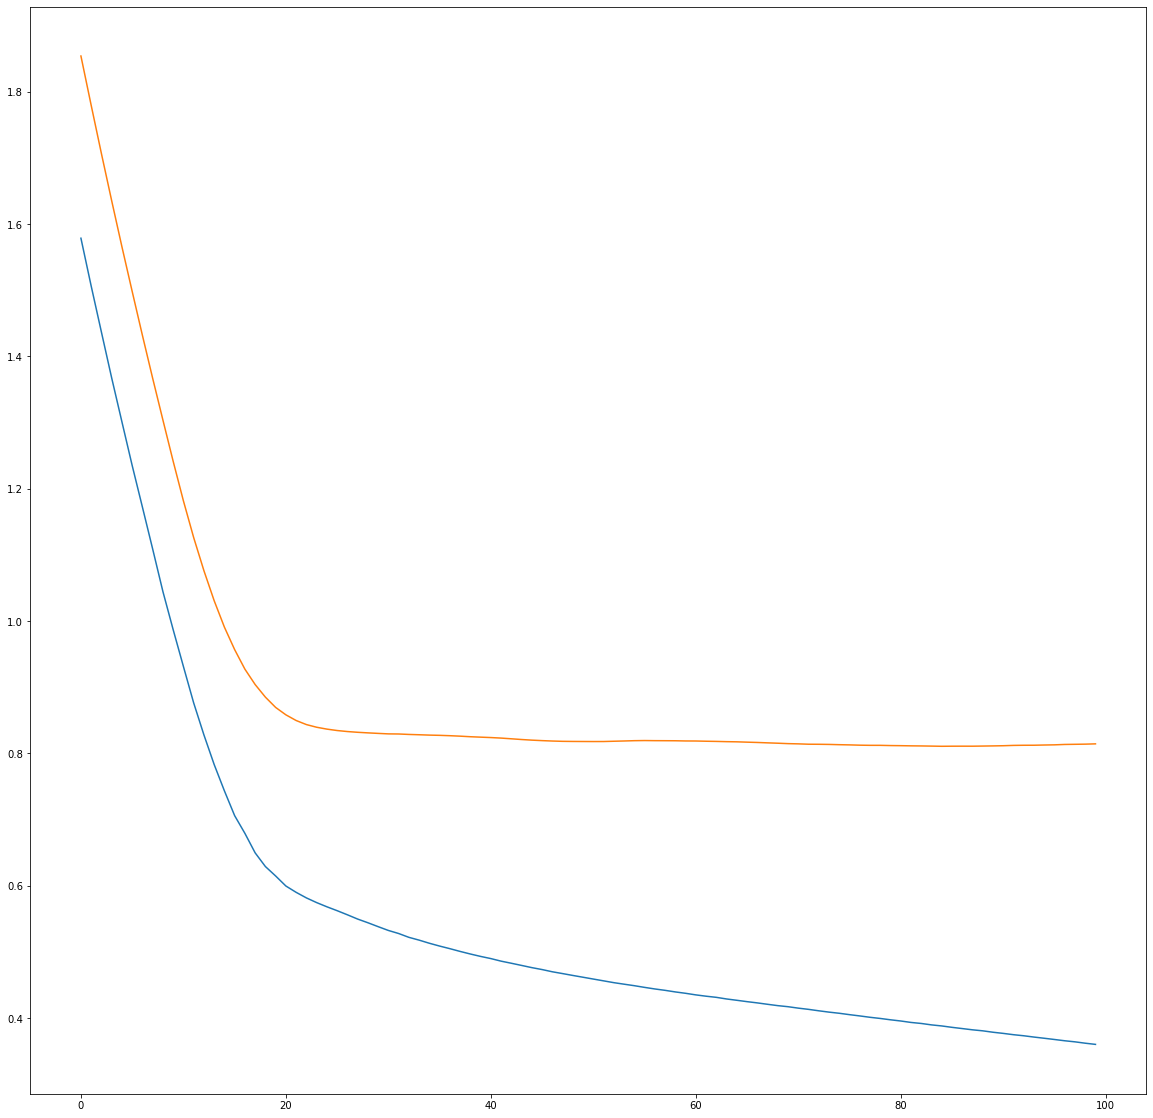

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Step1. Define the model
model = Sequential()
model.add(Dense(16, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (X_train.shape[1],)))
model.add(Dense(8, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(1))
#Step2. Compile the model
model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mae')
#Step3. Fit the model
history = model.fit(X_train, bmi_train, validation_data=(X_test, bmi_test), epochs=100,batch_size=64, verbose=0)
#Step4.1 Evaluate the model
loss, mae = model.evaluate(X_test, bmi_test)
#Step4.2 Plot the learning curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.show()

